In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings("ignore")
import re

In [2]:
invoice_df=pd.read_csv("../data/raw/final_csv/invoice.csv",index_col=0)

In [3]:
pincode_df=pd.read_csv("../data/external/Pincode_30052019.csv",index_col=0,encoding ="ISO-8859-1")

In [4]:
plant_df=pd.read_csv("../data/raw/final_csv/plant.csv",index_col=0)

In [5]:
invoice_plant_df=pd.merge(invoice_df,plant_df,on='Plant',how='left')   ## city and state are obtained coressponding to plant 

In [6]:
invoice_plant_df.shape

(984741, 70)

In [7]:
invoice_plant_df.head(10)

,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID,Name 1,Valuation Area,Customer no. - plant,Vendor number plant,Factory calendar,Name 2,House number and street,PO Box,Postal Code,City,Sales organization,State
0,0.00,0.00,NaN,0.00,0.00,0.00,0.00,Nashik,NaN,NaN,Retail,E14006,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2012-04-02,7000000011,17:04:33,101,2012-04-02,15:15:31,80440,420.09,HYUNDAI,0.00,SANTRO,7000000011.00,0.00,Running Repairs,0.00,0.00,422000,BC03,NASHIK,NaN,NO,0.00,MH15BN2714,0.00,0.00,0.00,0.00,nan,0.00,NaN,420.09,0.00,0.00,0.00,0.00,420.09,GOLIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN
1,0.00,0.00,NaN,0.00,0.00,0.00,0.00,THANE,NaN,NaN,Retail,0000000017,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2012-04-02,7000000014,17:26:52,105,2012-04-02,16:13:11,98474,179.75,MAHINDRA & MAHINDRA,0.00,LOGAN P,7000000014.00,0.00,Running Repairs,0.00,0.00,401107,BC01,THANE,NaN,NO,0.00,MH04DN6210,0.00,0.00,0.00,0.00,nan,0.00,NaN,179.75,0.00,0.00,0.00,0.00,179.75,GOLIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN
2,0.00,0.00,NaN,0.00,0.00,0.00,0.00,Hyderabad,NaN,NaN,Retail,0000000007,Andhra Pradesh,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2012-04-02,7000000016,17:44:03,6,2012-04-02,12:47:59,137832,1340.37,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,7000000016.00,0.00,Paid Service,0.00,0.00,500038,BC04,BALANAGAR,NaN,NO,0.00,AP11AB0153,0.00,0.00,0.00,0.00,nan,0.00,NaN,1340.37,0.00,0.00,0.00,0.00,1340.37,GOLIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN
3,0.00,0.00,NaN,0.00,0.00,0.00,0.00,Hyderabad,NaN,NaN,Retail,E22364,Andhra Pradesh,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2012-04-02,7000000026,20:04:51,24,2012-04-01,16:19:32,75627,1709.06,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,7000000026.00,480.02,Paid Service,0.00,3317.37,500023,BC04,BALANAGAR,NaN,NO,0.00,AP9BJ4847,0.00,0.00,0.00,0.00,nan,0.00,4302339,5506.45,0.00,0.00,0.00,0.00,5506.45,GOLIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN
4,0.00,0.00,NaN,0.00,0.00,0.00,0.00,Hyderabad,NaN,NaN,Retail,E25218,Andhra Pradesh,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2012-04-02,7000000027,20:24:21,23,2012-04-01,16:19:32,1,2074.88,TATA MOTORS,0.00,INDICA,7000000027.00,0.00,Accidental,0.00,3105.67,500045,BC04,BALANAGAR,NaN,NO,0.00,AP29BB4586,0.00,0.00,0.00,0.00,nan,0.00,4302337,5180.55,0.00,0.00,0.00,0.00,5180.55,GOLIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN
5,0.00,0.00,NaN,0.00,0.00,0.00,0.00,Hyderabad,NaN,NaN,Retail,E941,Andhra Pradesh,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2012-04-03,7000000028,09:10:57,33,2012-04-01,16:19:36,34430,599.10,MARUTI SUZUKI,0.00,ALTO,7000000028.00,0.00,Paid Service,0.00,1013.87,500036,BC04,BALANAGAR,NaN,NO,0.00,AP10AN83,0.00,0.00,0.00,0.00,nan,0.00,4302362,1612.97,0.00,0.00,0.00,0.00,1612.97,GOLIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN
6,0.00,0.00,NaN,0.00,0.00,0.00,0.00,Hyderabad,NaN,NaN,Retail,E27245,Andhra Pradesh,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2012-04-03,7000000029,10:18:25,35,2012-04-01,16:19:37,13879,598.87,MARUTI SUZUKI,0.00,OMNI,7000000029.00,0.00,Paid Service,0.00,789.58,500056,BC04,BALANAGAR,NaN,NO,0.00,AP02AE7658,0.00,0.00,0.00,0.00,nan,0.00,04302365,1388.45,0.00,0.00,0.00,0.00,1388.45,GOLIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN
7,0.00,0.00,NaN,0.00,0.00,0.00,0.00,Hyderabad,NaN,NaN,Retail,E25833,Andhra Pradesh,NaN,NaN,00:00:00,0.

In [8]:
(invoice_plant_df.isnull().sum()*100)/len(invoice_plant_df)

Amt Rcvd From Custom       70.04
Amt Rcvd From Ins Co       70.04
Area / Locality             2.96
CGST(14%)                  70.04
CGST(2.5%)                 70.04
CGST(6%)                   70.04
CGST(9%)                   70.04
CITY                        0.00
Cash /Cashless Type        97.22
Claim No.                  99.51
Cust Type                   0.00
Customer No.                0.00
District                    0.00
Expiry Date                90.11
Gate Pass Date             95.31
Gate Pass Time              0.00
IGST(12%)                  70.04
IGST(18%)                  70.04
IGST(28%)                  70.04
IGST(5%)                   70.04
Insurance Company          90.05
Invoice Date                0.00
Invoice No                  0.00
Invoice Time                0.00
Job Card No                 0.00
JobCard Date                0.00
JobCard Time                0.00
KMs Reading                 0.00
Labour Total                0.00
Make                        0.00
          

In [9]:
invoice_plant_df['Pincode_final']=invoice_plant_df['Postal Code']  ## create new pincode column - fill with postal code from plant_df
invoice_plant_df.loc[invoice_plant_df['Pincode_final'].isnull(),'Pincode_final']=invoice_plant_df['Pin code'] ## for those with missing pincode_final we''l fill them with pincode from invoice_df

In [10]:
len(plant_df['Plant'].unique())/len(plant_df) #all Plant in plant_df are unique 

1.0

In [11]:
pincode_df.head(10)

,Region Name,Division Name,Office Name,Pincode,OfficeType,Delivery,District,StateName
Circle Name,,,,,,,,
Andhra Pradesh Circle,Kurnool Region,Anantapur Division,A Narayanapuram B.O,515004,BO,Delivery,ANANTHAPUR,Andhra Pradesh
Andhra Pradesh Circle,Kurnool Region,Anantapur Division,Akuledu B.O,515731,BO,Delivery,ANANTHAPUR,Andhra Pradesh
Andhra Pradesh Circle,Kurnool Region,Anantapur Division,Alamuru B.O,515002,BO,Delivery,ANANTHAPUR,Andhra Pradesh
Andhra Pradesh Circle,Kurnool Region,Anantapur Division,Allapuram B.O,515766,BO,Delivery,ANANTHAPUR,Andhra Pradesh
Andhra Pradesh Circle,Kurnool Region,Anantapur Division,Aluru B.O,515415,BO,Delivery,ANANTHAPUR,Andhra Pradesh
Andhra Pradesh Circle,Kurnool Region,Anantapur Division,Amidyaya S.O,515822,SO,Delivery,ANANTHAPUR,Andhra Pradesh
Andhra Pradesh Circle,Kurnool Region,Anantapur Division,Ammaladinne S.O,515445,SO,Delivery,ANANTHAPUR,Andhra Pradesh
Andhra Pradesh Circle,Kurnool Region,Anantapur Division,Anantapur Collectorate S.O,515001,SO,Non Delivery,ANANTHAPUR,Andhra Pradesh
Andhra Pradesh Circle,Kurnool Region,Anantapur Division,Anantapur Engg College S.O,515002,SO,Delivery,ANANTHAPUR,Andhra Pradesh


In [12]:
len(invoice_plant_df.loc[invoice_plant_df['State'].isnull(),'Plant'])  ## missing states

236645

In [13]:
aggregations_pin={
    'StateName' : {'StateName_Pincode' : lambda x:str(set(x)).strip('{}').replace("'","")},
    'Office Name' : {'Office_Name_pincode_df': lambda x:str(list(x)).strip('[]')}
}

pincode_df_group=pincode_df.groupby('Pincode')['StateName','Office Name'].agg(aggregations_pin).reset_index()

In [14]:
pincode_df_group.head(5)   ## have state corresponding to pincode 

,Pincode,StateName_Pincode,Office_Name_pincode_df
0,110001,Delhi,"'Baroda House SO', 'Bengali Market SO', 'Bhaga..."
1,110002,Delhi,"'AGCR EXTENSION COUNTER', 'AGCR SO', 'Ajmeri G..."
2,110003,Delhi,"'Delhi High Court Extension Counter SO', 'Delh..."
3,110004,Delhi,'Rashtrapati Bhawan SO'
4,110005,Delhi,"'Anand Parbat Indl Area SO', 'Anand Parbat SO'..."


In [15]:
invoice_plant_pincode_df=pd.merge(invoice_plant_df,pincode_df_group,left_on='Pincode_final',right_on='Pincode',how='left')  
##merge pincode_df_group to 

In [16]:
invoice_plant_pincode_df.head(5)

,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID,Name 1,Valuation Area,Customer no. - plant,Vendor number plant,Factory calendar,Name 2,House number and street,PO Box,Postal Code,City,Sales organization,State,Pincode_final,Pincode,StateName_Pincode,Office_Name_pincode_df
0,0.00,0.00,NaN,0.00,0.00,0.00,0.00,Nashik,NaN,NaN,Retail,E14006,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2012-04-02,7000000011,17:04:33,101,2012-04-02,15:15:31,80440,420.09,HYUNDAI,0.00,SANTRO,7000000011.00,0.00,Running Repairs,0.00,0.00,422000,BC03,NASHIK,NaN,NO,0.00,MH15BN2714,0.00,0.00,0.00,0.00,nan,0.00,NaN,420.09,0.00,0.00,0.00,0.00,420.09,GOLIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,422000.00,nan,NaN,NaN
1,0.00,0.00,NaN,0.00,0.00,0.00,0.00,THANE,NaN,NaN,Retail,0000000017,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2012-04-02,7000000014,17:26:52,105,2012-04-02,16:13:11,98474,179.75,MAHINDRA & MAHINDRA,0.00,LOGAN P,7000000014.00,0.00,Running Repairs,0.00,0.00,401107,BC01,THANE,NaN,NO,0.00,MH04DN6210,0.00,0.00,0.00,0.00,nan,0.00,NaN,179.75,0.00,0.00,0.00,0.00,179.75,GOLIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,401107.00,401107.00,Maharashtra,"'Ghodbander B.O', 'Kashi B.O', 'Mira Road S.O'..."
2,0.00,0.00,NaN,0.00,0.00,0.00,0.00,Hyderabad,NaN,NaN,Retail,0000000007,Andhra Pradesh,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2012-04-02,7000000016,17:44:03,6,2012-04-02,12:47:59,137832,1340.37,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,7000000016.00,0.00,Paid Service,0.00,0.00,500038,BC04,BALANAGAR,NaN,NO,0.00,AP11AB0153,0.00,0.00,0.00,0.00,nan,0.00,NaN,1340.37,0.00,0.00,0.00,0.00,1340.37,GOLIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,500038.00,500038.00,Telangana,"'Sanjeev Reddy Nagar S.O', 'Vengal Rao Nagar S.O'"
3,0.00,0.00,NaN,0.00,0.00,0.00,0.00,Hyderabad,NaN,NaN,Retail,E22364,Andhra Pradesh,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2012-04-02,7000000026,20:04:51,24,2012-04-01,16:19:32,75627,1709.06,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,7000000026.00,480.02,Paid Service,0.00,3317.37,500023,BC04,BALANAGAR,NaN,NO,0.00,AP9BJ4847,0.00,0.00,0.00,0.00,nan,0.00,4302339,5506.45,0.00,0.00,0.00,0.00,5506.45,GOLIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,500023.00,500023.00,Telangana,'Yakutpura S.O'
4,0.00,0.00,NaN,0.00,0.00,0.00,0.00,Hyderabad,NaN,NaN,Retail,E25218,Andhra Pradesh,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2012-04-02,7000000027,20:24:21,23,2012-04-01,16:19:32,1,2074.88,TATA MOTORS,0.00,INDICA,7000000027.00,0.00,Accidental,0.00,3105.67,500045,BC04,BALANAGAR,NaN,NO,0.00,AP29BB4586,0.00,0.00,0.00,0.00,nan,0.00,4302337,5180.55,0.00,0.00,0.00,0.00,5180.55,GOLIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,500045.00,500045.00,Telangana,"'A.Gs. Staff Quarters S.O', 'Yousufguda S.O'"


In [17]:
(invoice_plant_pincode_df.isnull().sum()*100)/len(invoice_plant_pincode_df)

Amt Rcvd From Custom       70.04
Amt Rcvd From Ins Co       70.04
Area / Locality             2.96
CGST(14%)                  70.04
CGST(2.5%)                 70.04
CGST(6%)                   70.04
CGST(9%)                   70.04
CITY                        0.00
Cash /Cashless Type        97.22
Claim No.                  99.51
Cust Type                   0.00
Customer No.                0.00
District                    0.00
Expiry Date                90.11
Gate Pass Date             95.31
Gate Pass Time              0.00
IGST(12%)                  70.04
IGST(18%)                  70.04
IGST(28%)                  70.04
IGST(5%)                   70.04
Insurance Company          90.05
Invoice Date                0.00
Invoice No                  0.00
Invoice Time                0.00
Job Card No                 0.00
JobCard Date                0.00
JobCard Time                0.00
KMs Reading                 0.00
Labour Total                0.00
Make                        0.00
          

In [18]:
## city is what i have obtained from the plants df which is standard 
## now i wish to fill in the missing city in invoice_plant_pincode_df( actually merged from plant )with the CITY from invoice which is accurate

In [19]:
invoice_plant_pincode_df.loc[invoice_plant_pincode_df['City'].isnull()==True,['City','CITY']].tail(10) 
## so we'll be omiiting a lot of values in CITY column and be using city column from the plant_df

,City,CITY
984731,NaN,nagpur
984732,NaN,PHASE-2
984733,NaN,SEC-2B VAISHALI
984734,NaN,FARIDABAD
984735,NaN,rajender nagrar
984736,NaN,NELLORE
984737,NaN,PUNE
984738,NaN,PUNE
984739,NaN,CHENNAI
984740,NaN,PUNE


In [20]:
#invoice_plant_pincode_df.loc[invoice_plant_pincode_df['City'].isnull(),'City']=invoice_plant_pincode_df['CITY']

In [21]:
invoice_plant_pincode_df['City']=invoice_plant_pincode_df['City'].str.lower()

In [22]:
len(invoice_plant_pincode_df.loc[invoice_plant_pincode_df['City'].isnull()==True,['City','CITY']])*100/len(invoice_plant_pincode_df)

24.03119195808847

In [23]:
len(invoice_plant_pincode_df.loc[invoice_plant_pincode_df['City'].isnull()==True,['City','CITY','Pincode_final','Pincode','StateName_Pincode']])  ## missing cities

236645

In [24]:
len(invoice_plant_pincode_df.loc[invoice_plant_pincode_df['StateName_Pincode'].isnull(),:]) ## missing states

47205

In [25]:
invoice_plant_pincode_df.loc[invoice_plant_pincode_df['StateName_Pincode'].isnull(),['City','CITY','Pincode_final','Postal Code','StateName_Pincode','District']].head(15)  
## A lot of data is lost around 4 % for states and 24 % for city

,City,CITY,Pincode_final,Postal Code,StateName_Pincode,District
0,NaN,Nashik,422000.00,nan,NaN,Maharashtra
11,NaN,igatpuri,420001.00,nan,NaN,Maharashtra
16,NaN,Nashik,422000.00,nan,NaN,Maharashtra
20,NaN,Nashik,422000.00,nan,NaN,Maharashtra
26,NaN,Nashik,422000.00,nan,NaN,Maharashtra
29,NaN,Nashik,422000.00,nan,NaN,Maharashtra
31,NaN,NASIK,420010.00,nan,NaN,Maharashtra
32,NaN,Nashik,422000.00,nan,NaN,Maharashtra
39,NaN,Nashik,422000.00,nan,NaN,Maharashtra
48,NaN,Nashik,422000.00,nan,NaN,Maharashtra


In [26]:
#invoice_plant_pincode_df.loc[invoice_plant_pincode_df['StateName_Pincode'].isnull(),'StateName_Pincode']=invoice_plant_pincode_df['District']

In [27]:
invoice_plant_pincode_df.loc[(invoice_plant_pincode_df['City']=='mumbai')&(invoice_plant_pincode_df['StateName_Pincode']!='Maharashtra'),['City','Pincode_final','State','District']]
# but no mis classified data

,City,Pincode_final,State,District


In [28]:
#invoice_plant_pincode_df.loc[(invoice_plant_pincode_df['City']=='mumbai')&(invoice_plant_pincode_df['StateName_Pincode']!='Maharashtra'),['City','CITY','Pincode_final','StateName_Pincode','District','Postal Code','Plant']].head(15)
## cant trust CITY

In [29]:
(invoice_plant_pincode_df.isnull().sum()*100)/len(invoice_plant_pincode_df)

Amt Rcvd From Custom       70.04
Amt Rcvd From Ins Co       70.04
Area / Locality             2.96
CGST(14%)                  70.04
CGST(2.5%)                 70.04
CGST(6%)                   70.04
CGST(9%)                   70.04
CITY                        0.00
Cash /Cashless Type        97.22
Claim No.                  99.51
Cust Type                   0.00
Customer No.                0.00
District                    0.00
Expiry Date                90.11
Gate Pass Date             95.31
Gate Pass Time              0.00
IGST(12%)                  70.04
IGST(18%)                  70.04
IGST(28%)                  70.04
IGST(5%)                   70.04
Insurance Company          90.05
Invoice Date                0.00
Invoice No                  0.00
Invoice Time                0.00
Job Card No                 0.00
JobCard Date                0.00
JobCard Time                0.00
KMs Reading                 0.00
Labour Total                0.00
Make                        0.00
          

In [30]:
## cities might have little ambiguity  24 percent missing to 0 percent missing
## states from 24% to 8% missing

In [31]:
invoice_plant_pincode_df['City']=invoice_plant_pincode_df['City'].str.lower()             ## Pincode_invoice is needed

In [32]:
#invoice_plant_pincode_df.loc[Invoice_plant_pincode_df['City'],['Çity']]
#valuecounts=
value_counts=invoice_plant_pincode_df['City'].value_counts()   
len(value_counts[value_counts==1])   ## 2875 weird cities

0

In [33]:
value_counts[value_counts==20] ## no weird cities after not imputing the missing data for city and state

Series([], Name: City, dtype: int64)

In [34]:
invoice_plant_pincode_df.to_csv('invoice_plant_pincode_df.csv',index=False)  

In [35]:
invoice_plant_pincode_df['Invoice Date']=pd.to_datetime(invoice_plant_pincode_df['Invoice Date'])

In [36]:
invoice_plant_pincode_df['Invoice_Date_Time']=invoice_plant_pincode_df['Invoice Date'].astype(str).str.cat(invoice_plant_pincode_df[['Invoice Time']].astype(str),sep=' ')

In [37]:
invoice_plant_pincode_df.loc[:,['Invoice_Date_Time','Invoice Date','Invoice Time']].head(5)

,Invoice_Date_Time,Invoice Date,Invoice Time
0,2012-04-02 17:04:33,2012-04-02,17:04:33
1,2012-04-02 17:26:52,2012-04-02,17:26:52
2,2012-04-02 17:44:03,2012-04-02,17:44:03
3,2012-04-02 20:04:51,2012-04-02,20:04:51
4,2012-04-02 20:24:21,2012-04-02,20:24:21


In [38]:
invoice_plant_pincode_df['Invoice_Date_Time']=pd.to_datetime(invoice_plant_pincode_df['Invoice_Date_Time'])

In [39]:
invoice_plant_pincode_df['JobCard_Date_Time']=invoice_plant_pincode_df['JobCard Date'].astype(str).str.cat(invoice_plant_pincode_df[['JobCard Time']].astype(str),sep=' ')

In [40]:
invoice_plant_pincode_df.loc[:,['JobCard_Date_Time','JobCard Date','JobCard Time']].head(5)

,JobCard_Date_Time,JobCard Date,JobCard Time
0,2012-04-02 15:15:31,2012-04-02,15:15:31
1,2012-04-02 16:13:11,2012-04-02,16:13:11
2,2012-04-02 12:47:59,2012-04-02,12:47:59
3,2012-04-01 16:19:32,2012-04-01,16:19:32
4,2012-04-01 16:19:32,2012-04-01,16:19:32


In [41]:
invoice_plant_pincode_df['JobCard_Date_Time']=pd.to_datetime(invoice_plant_pincode_df['JobCard_Date_Time'])

In [42]:
invoice_plant_pincode_df['Service_Time']=invoice_plant_pincode_df['Invoice_Date_Time']-invoice_plant_pincode_df['JobCard_Date_Time']

In [43]:
invoice_plant_pincode_df_filtered=invoice_plant_pincode_df.loc[invoice_plant_pincode_df['Service_Time']>pd.Timedelta(hours=0),:]

In [44]:
invoice_plant_pincode_df_filtered['Service_Time'].describe()

count                     984740
mean      4 days 03:55:29.575841
std      13 days 18:22:46.212680
min              0 days 00:00:36
25%              0 days 01:58:30
50%       0 days 07:37:36.500000
75%       2 days 21:42:23.500000
max           1112 days 03:19:12
Name: Service_Time, dtype: object

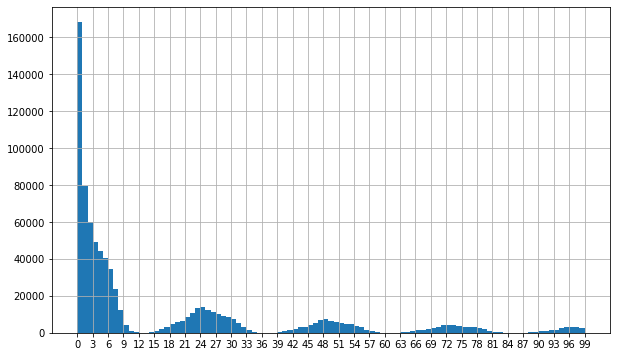

In [45]:
plt.figure(figsize=(10,6))
(invoice_plant_pincode_df_filtered['Service_Time']/pd.Timedelta(hours=1)).hist(bins=range(0,100,1))
plt.xticks(np.arange(0,100, step=3))
plt.show()

In [46]:
invoice_plant_pincode_df_filtered['Service_time_category']=None
invoice_plant_pincode_df_filtered.loc[invoice_plant_pincode_df_filtered['Service_Time']<pd.Timedelta(hours=13),'Service_time_category']='super_fast'
invoice_plant_pincode_df_filtered.loc[(invoice_plant_pincode_df_filtered['Service_Time']>=pd.Timedelta(hours=13))&(invoice_plant_pincode_df_filtered['Service_Time']<pd.Timedelta(hours=36)),'Service_time_category']='fast'
invoice_plant_pincode_df_filtered.loc[(invoice_plant_pincode_df_filtered['Service_Time']>=pd.Timedelta(hours=36))&(invoice_plant_pincode_df_filtered['Service_Time']<pd.Timedelta(hours=61)),'Service_time_category']='mid'
invoice_plant_pincode_df_filtered.loc[(invoice_plant_pincode_df_filtered['Service_Time']>=pd.Timedelta(hours=61))&(invoice_plant_pincode_df_filtered['Service_Time']<pd.Timedelta(hours=84)),'Service_time_category']='slow'
invoice_plant_pincode_df_filtered.loc[invoice_plant_pincode_df_filtered['Service_Time']>=pd.Timedelta(hours=84),'Service_time_category']='super_slow'

In [47]:
invoice_plant_pincode_df_filtered.loc[:,['Service_Time','Service_time_category']].head(10)

,Service_Time,Service_time_category
0,0 days 01:49:02,super_fast
1,0 days 01:13:41,super_fast
2,0 days 04:56:04,super_fast
3,1 days 03:45:19,fast
4,1 days 04:04:49,fast
5,1 days 16:51:21,mid
6,1 days 17:58:48,mid
7,1 days 18:09:09,mid
8,0 days 20:49:46,fast
9,1 days 18:41:45,mid


In [48]:
pincode_value_counts=pincode_df_group['StateName_Pincode'].value_counts()
pincode_value_counts[(pincode_value_counts>=1)&(pincode_value_counts<=2)]  ## these pincode when grouped are giving different states

Andaman and Nico.In., Uttar Pradesh                                                                                   2
Sikkim, Nagaland                                                                                                      2
Andaman and Nico.In., West Bengal                                                                                     2
Bihar, Uttar Pradesh                                                                                                  2
Maharashtra, Uttar Pradesh                                                                                            1
Chandigarh, Uttar Pradesh                                                                                             1
Tripura, Nagaland, Odisha, Punjab, Sikkim, Haryana, Mizoram, Tamil Nadu, Rajasthan, Maharashtra, Manipur, Megalaya    1
Telangana, Jharkhand                                                                                                  1
Mizoram, Tripura                        

In [49]:
pincode_df_group.loc[pincode_df_group.StateName_Pincode.isin(pincode_value_counts[(pincode_value_counts>=1)&(pincode_value_counts<=3)].index),['Pincode','StateName_Pincode']]
#Now we can decide whether to remove or keep these rows with the below pincodes don't have hardly any values

,Pincode,StateName_Pincode
69,110071,"Haryana, Delhi"
179,124105,"Karnataka, Haryana, Madhya Pradesh, Kerala"
200,124505,"Himachal Pradesh, Haryana, Jammu and Kashmir"
201,124506,"Haryana, Uttar Pradesh"
203,124508,"Tripura, Nagaland, Odisha, Punjab, Sikkim, Har..."
283,127311,"Himachal Pradesh, Haryana"
3191,272124,"Uttar Pradesh, Dadra and Nagar Hav."
3196,272129,"Daman and Diu, Uttar Pradesh"
3198,272131,"Chandigarh, Uttar Pradesh"
3201,272151,"Andaman and Nico.In., Uttar Pradesh"


In [50]:
len(pincode_df_group[pincode_df_group.StateName_Pincode.isin(pincode_value_counts[(pincode_value_counts>=1)&(pincode_value_counts<=2)].index)]
)

29

In [51]:
unnecessary_pincode=pincode_df_group.loc[pincode_df_group.StateName_Pincode.isin(pincode_value_counts[(pincode_value_counts>=1)&(pincode_value_counts<=2)].index),['Pincode']]

In [52]:
unnecessary_pincode.head(10)

,Pincode
69,110071
179,124105
200,124505
201,124506
203,124508
283,127311
3191,272124
3196,272129
3198,272131
3201,272151


In [53]:
invoice_plant_pincode_df_filtered=invoice_plant_pincode_df_filtered[~invoice_plant_pincode_df_filtered['Pincode_final'].isin(unnecessary_pincode)] 

In [54]:
(invoice_plant_pincode_df_filtered.isnull().sum()*100)/len(invoice_plant_pincode_df_filtered)

Amt Rcvd From Custom       70.04
Amt Rcvd From Ins Co       70.04
Area / Locality             2.96
CGST(14%)                  70.04
CGST(2.5%)                 70.04
CGST(6%)                   70.04
CGST(9%)                   70.04
CITY                        0.00
Cash /Cashless Type        97.22
Claim No.                  99.51
Cust Type                   0.00
Customer No.                0.00
District                    0.00
Expiry Date                90.11
Gate Pass Date             95.31
Gate Pass Time              0.00
IGST(12%)                  70.04
IGST(18%)                  70.04
IGST(28%)                  70.04
IGST(5%)                   70.04
Insurance Company          90.05
Invoice Date                0.00
Invoice No                  0.00
Invoice Time                0.00
Job Card No                 0.00
JobCard Date                0.00
JobCard Time                0.00
KMs Reading                 0.00
Labour Total                0.00
Make                        0.00
          

In [55]:
invoice_plant_pincode_df_filtered['City'].value_counts().head(15)

chennai       31581
bengaluru     18536
coimbatore    15844
nashik        14443
thane         12130
mangalore     12011
mohali        11186
madurai       11068
pune           9004
moga           8748
jaipur         8467
neyveli        8025
aurangabad     7603
nagpur         7566
bhopal         7369
Name: City, dtype: int64

In [56]:
city_value_counts=invoice_plant_pincode_df_filtered['City'].value_counts()

In [57]:
city_value_counts[city_value_counts<=6]  ## i dont think i'll be removing the cities coz cities with less than 6 count dont exist

lalitpur    6
Name: City, dtype: int64

In [58]:
invoice_plant_pincode_df_filtered.loc[(invoice_plant_pincode_df['Plant']=='BC07')&(invoice_plant_pincode_df['Postal Code'].notnull()),['Plant','Pincode_final','Job Card No','Regn No','StateName_Pincode']].head(10) ## 

,Plant,Pincode_final,Job Card No,Regn No,StateName_Pincode
36,BC07,600107.00,196,MH15F3815,Tamil Nadu
56,BC07,600107.00,211,TN09AE6656,Tamil Nadu
60,BC07,600107.00,264,TN09AJ7423,Tamil Nadu
68,BC07,600107.00,214,TN01AE0299,Tamil Nadu
69,BC07,600107.00,139,TN01AM0090,Tamil Nadu
86,BC07,600107.00,120,TN45AL3188,Tamil Nadu
88,BC07,600107.00,216,TN01AA3903,Tamil Nadu
103,BC07,600107.00,233,TN09AU8230,Tamil Nadu
190,BC07,600107.00,354,TN02AL9416,Tamil Nadu
193,BC07,600107.00,414,TN23AC3099,Tamil Nadu


In [59]:
invoice_plant_pincode_df_filtered.loc[invoice_plant_pincode_df['Plant']=='X381',['Plant','StateName_Pincode','Pincode_final','City']].head(15)

,Plant,StateName_Pincode,Pincode_final,City
489734,X381,Punjab,143001.00,amritsar
489735,X381,Punjab,143001.00,amritsar
493650,X381,Punjab,143001.00,amritsar
493651,X381,Punjab,143001.00,amritsar
501334,X381,Punjab,143001.00,amritsar
501335,X381,Punjab,143001.00,amritsar
501336,X381,Punjab,143001.00,amritsar
501337,X381,Punjab,143001.00,amritsar
501338,X381,Punjab,143001.00,amritsar
501339,X381,Punjab,143001.00,amritsar


In [60]:
invoice_plant_pincode_df_filtered.to_csv('invoice_plant_pincode_df_filtered.csv',index=False,header=True)

In [61]:
jtd_df=pd.read_csv("../data/raw/final_csv/jtd.csv",index_col=0)

In [62]:
aggregation_jtd_dbno={
    'Description' : {'Description' : lambda x: list(x)},
    'Item Category' : {'Item Category' : lambda x: list(x)},
    'Order Quantity' : {'Order Quantity' : 'sum'},
    'Net value' : {'Net value' : 'sum'}
}


jtd_df_grp_dbmno=jtd_df.groupby('DBM Order')['Description','Item Category','Order Quantity','Net value'].agg(aggregation_jtd_dbno).reset_index()

In [63]:
jtd_df_grp_dbmno.tail(20)

,DBM Order,Description,Item Category,Order Quantity,Net value
973453,1001255,[WASHING],[P001],84.00,194.06
973454,1001256,[MISC_OTHER CHARGES],[P011],1.00,250.00
973455,1001257,[PAINTING FULL BODY - METALLIC],[P001],27000.00,30000.00
973456,1001258,"[HORN SET, REPLACE HORN PAD]","[P002, P001]",25.00,454.86
973457,1001259,[WASHING],[P001],96.00,230.50
973458,1001261,"[FILTER CARTRIDGE - NEF/XD3P, WINDSHIELD LIQUI...","[P002, P002, P002, P002, P001]",5.00,1635.18
973459,1001262,[Antifreeze Coolant- Green Colour],[P002],1.00,190.68
973460,1001263,[nan],[G2TX],0.00,0.00
973461,1001264,"[MFC PROLEUM CI4/SL 15W40, OIL FILTER, FRONT B...","[P002, P002, P002, P002, P002, P001]",127.60,7914.18
973462,1001267,"[Paid Service-Minor, Wheel Alignment, API CI4/...","[P001, P001, P002, P002, P002]",5.00,1274.58


In [64]:
aggregations_by_jobcard={
    'Parts Total': {'Parts Total' : 'sum'},
    'OSL Total' : {'OSL Total' : 'sum'},
    'Labour Total' : {'Labour Total' : 'sum'},
    'Misc Total' : {'Misc Total' : 'sum'},
    'Make' : {'Make' : lambda x: str(set(x)).strip("{}").replace("'","")},
    'Model' : {'Model' : lambda x: str(set(x)).strip("{}").replace("'","")},
    'StateName_Pincode' : {'StateName_Pincode' : lambda x: str(set(x)).strip("{}").replace("'","")},
    'City' : {'City' : lambda x: str(set(x)).strip("{}").replace("'","")},
    'Customer No.' : {'Customer No.' : lambda x: str(set(x)).strip("{}").replace("'","").lstrip("0")},
    'Regn No' : {'Regn No' : lambda x: str(set(x)).strip("{}").replace("'","")},
    'Service_time_category' : {'Service_time_category' : lambda x: str(set(x)).strip("{}").replace("'","")},
    'Service_Time' : {'Service_Time' : 'max'},
    'Pincode_final' : {'Pincode_final' : lambda x: str(set(x)).strip("{}").replace("'","")},
    'KMs Reading' : {'KMs Reading' : 'max'},
    'Invoice No' : {'Invoice_count' : 'nunique'},
    'Cust Type' : {'Cust Type' : lambda x: str(set(x)).strip("{}").replace("'","")},
    'Order Type' : {'Order Type' : lambda x: str(set(x)).strip("{}").replace("'","")},
    'JobCard Date' : {'JobCard Date' : lambda x: str(set(x)).strip("{}").replace("'","")},
    'Name 1' : {'Name 1' : lambda x: str(set(x)).strip("{}").replace("'","")},
    'House number and street' : {'House number and street' : lambda x: str(set(x)).strip("{}").replace("'","")},
    'Plant' : {'Plant' : lambda x: str(set(x)).strip("{}").replace("'","")}
    
}
invoice_plant_pincode_df_filtered_grp_jobcard=invoice_plant_pincode_df_filtered.groupby('Job Card No')['Parts Total','OSL Total','Labour Total','Misc Total','Make','Model','StateName_Pincode','City','Customer No.','Regn No','Service_time_category','Service_Time','Pincode_final','KMs Reading','Invoice No','Cust Type','Order Type','JobCard Date','Name 1','House number and street','Plant'].agg(aggregations_by_jobcard).reset_index()

In [65]:
perc_missing_invoice_plant_pincode_df_filtered=(invoice_plant_pincode_df_filtered.isnull().sum()*100/len(invoice_plant_pincode_df_filtered))

In [66]:
perc_missing_invoice_plant_pincode_df_filtered[perc_missing_invoice_plant_pincode_df_filtered<=70]

Area / Locality            2.96
CITY                       0.00
Cust Type                  0.00
Customer No.               0.00
District                   0.00
Gate Pass Time             0.00
Invoice Date               0.00
Invoice No                 0.00
Invoice Time               0.00
Job Card No                0.00
JobCard Date               0.00
JobCard Time               0.00
KMs Reading                0.00
Labour Total               0.00
Make                       0.00
Misc Total                 0.00
Model                      0.15
OSL Total                  0.00
Order Type                 0.00
Parts Total                0.00
Pin code                   0.00
Plant                      0.00
Plant Name1                0.00
Print Status               0.00
Recovrbl Exp               0.00
Regn No                    0.00
Total Amt Wtd Tax.         0.00
User ID                    0.00
Name 1                    24.03
Valuation Area            24.03
Customer no. - plant      24.03
Factory 

In [67]:
invoice_plant_pincode_df_filtered.loc[invoice_plant_pincode_df_filtered['Job Card No']==191,['Service_Time','Invoice No','JobCard Date','JobCard Time','Invoice Time','Regn No','KMs Reading']]
## invoice time is different so picking up the max time which is last invoice time  

,Service_Time,Invoice No,JobCard Date,JobCard Time,Invoice Time,Regn No,KMs Reading
37,05:39:53,7000000061,2012-04-03,12:56:57,18:36:50,MH02Y8891,78313
38,05:40:02,7000000062,2012-04-03,12:56:57,18:36:59,MH02Y8891,78313


In [68]:
invoice_plant_pincode_df_filtered_grp_jobcard.head(10)

,Job Card No,Parts Total,OSL Total,Labour Total,Misc Total,Make,Model,StateName_Pincode,City,Customer No.,Regn No,Service_time_category,Service_Time,Pincode_final,KMs Reading,Invoice_count,Cust Type,Order Type,JobCard Date,Name 1,House number and street,Plant
0,4,11042.62,2399.95,3455.92,100.00,MAHINDRA & MAHINDRA,LOGAN P,Tamil Nadu,nan,E4981,MH03F9574,super_slow,5 days 23:09:10,600032.00,191383,1,Retail,Running Repairs,2012-04-01,nan,nan,BC01
1,5,1469.33,0.00,2310.47,0.00,GENERAL MOTORS,OPTRA,Maharashtra,nan,10,MH43A5790,mid,2 days 03:10:25,400093.00,105073,1,Retail,Paid Service,2012-04-02,nan,nan,BC01
2,6,0.00,0.00,1340.37,0.00,MAHINDRA & MAHINDRA,SCORPIO CRDE,Telangana,nan,7,AP11AB0153,super_fast,0 days 04:56:04,500038.00,137832,1,Retail,Paid Service,2012-04-02,nan,nan,BC04
3,7,0.00,0.00,167.36,0.00,MAHINDRA & MAHINDRA,SCORPIO CRDE,Maharashtra,nan,11,MH15BD5265,fast,0 days 23:30:29,422001.00,136240,1,Retail,Running Repairs,2012-04-02,nan,nan,BC03
4,8,2106.92,0.00,200.02,0.00,HYUNDAI,VERNA,Maharashtra,nan,E12096,MH15CD961,fast,0 days 20:49:46,422007.00,140260,1,Retail,Running Repairs,2012-04-02,nan,nan,BC03
5,9,662.01,0.00,616.12,0.00,MARUTI SUZUKI,SWIFT,nan,nan,E22798,MH08Q5679,fast,1 days 05:51:15,422000.00,78513,1,Retail,Paid Service,2012-04-02,nan,nan,BC03
6,10,5722.37,0.00,1377.99,0.00,FORD,FIESTA,Maharashtra,nan,14,MH41C6785,fast,1 days 04:55:31,422013.00,49842,1,Retail,Paid Service,2012-04-02,nan,nan,BC03
7,11,10756.82,120.00,2377.55,100.00,MAHINDRA & MAHINDRA,LOGAN P,Tamil Nadu,nan,E4981,MH01JA5144,super_slow,8 days 01:03:10,600032.00,204207,1,Retail,Running Repairs,2012-04-01,nan,nan,BC01
8,12,16061.47,4839.96,2450.40,100.00,MAHINDRA & MAHINDRA,LOGAN P,Tamil Nadu,nan,E4981,MH01JA5003,super_slow,20 days 00:02:08,600032.00,166696,1,Retail,Running Repairs,2012-04-01,nan,nan,BC01
9,13,187754.80,2850.00,8750.00,0.00,MAHINDRA & MAHINDRA,SCORPIO CRDE,Telangana,nan,E26196,MH12FF9716,super_slow,24 days 02:26:00,502307.00,1,1,Retail,Accidental,2012-04-01,nan,nan,BC04


In [69]:
invoice_plant_pincode_jtd_df=pd.merge(invoice_plant_pincode_df_filtered_grp_jobcard,jtd_df_grp_dbmno,how='left',left_on='Job Card No',right_on='DBM Order')

In [70]:
invoice_plant_pincode_jtd_df.head(10)

,Job Card No,Parts Total,OSL Total,Labour Total,Misc Total,Make,Model,StateName_Pincode,City,Customer No.,Regn No,Service_time_category,Service_Time,Pincode_final,KMs Reading,Invoice_count,Cust Type,Order Type,JobCard Date,Name 1,House number and street,Plant,DBM Order,Description,Item Category,Order Quantity,Net value
0,4,11042.62,2399.95,3455.92,100.00,MAHINDRA & MAHINDRA,LOGAN P,Tamil Nadu,nan,E4981,MH03F9574,super_slow,5 days 23:09:10,600032.00,191383,1,Retail,Running Repairs,2012-04-01,nan,nan,BC01,4.00,"[WUERTH ANTIFREEZ COOLANT GREEN, VALVE 1-INTAK...","[P002, P002, P002, P002, P002, P002, P002, P00...",731.60,16998.49
1,5,1469.33,0.00,2310.47,0.00,GENERAL MOTORS,OPTRA,Maharashtra,nan,10,MH43A5790,mid,2 days 03:10:25,400093.00,105073,1,Retail,Paid Service,2012-04-02,nan,nan,BC01,5.00,"[Paid Service-Major, REPLACE BRAKE PAD (BOTH S...","[P001, P001, P002, P002, P002, P001, P002, P00...",290.20,3779.80
2,6,0.00,0.00,1340.37,0.00,MAHINDRA & MAHINDRA,SCORPIO CRDE,Telangana,nan,7,AP11AB0153,super_fast,0 days 04:56:04,500038.00,137832,1,Retail,Paid Service,2012-04-02,nan,nan,BC04,6.00,"[Paid Service-Minor, REPLACE STARTER MOTOR ASS...","[P001, P001, P001]",109.00,1340.37
3,7,0.00,0.00,167.36,0.00,MAHINDRA & MAHINDRA,SCORPIO CRDE,Maharashtra,nan,11,MH15BD5265,fast,0 days 23:30:29,422001.00,136240,1,Retail,Running Repairs,2012-04-02,nan,nan,BC03,7.00,[MISC LABOR 0.25 HOURS],[P001],36.50,167.36
4,8,2106.92,0.00,200.02,0.00,HYUNDAI,VERNA,Maharashtra,nan,E12096,MH15CD961,fast,0 days 20:49:46,422007.00,140260,1,Retail,Running Repairs,2012-04-02,nan,nan,BC03,8.00,"[REPLACE ENGINE OIL & OIL FILTER, AIR FILTER, ...","[P001, P002, P002, P002, P002, P002]",69.00,2306.94
5,9,662.01,0.00,616.12,0.00,MARUTI SUZUKI,SWIFT,nan,nan,E22798,MH08Q5679,fast,1 days 05:51:15,422000.00,78513,1,Retail,Paid Service,2012-04-02,nan,nan,BC03,9.00,"[CLIP, BULB 55W,12V,PGJ19-2,H11, BOLT 10MM, BE...","[P002, P002, P002, P002, P002, P001, P002, P001]",28.00,1278.13
6,10,5722.37,0.00,1377.99,0.00,FORD,FIESTA,Maharashtra,nan,14,MH41C6785,fast,1 days 04:55:31,422013.00,49842,1,Retail,Paid Service,2012-04-02,nan,nan,BC03,10.00,"[Wheel Alignment, Wheel Balancing (5 Wheels), ...","[P001, P001, P002, P002, P002, P002, P002, P00...",66.80,7100.36
7,11,10756.82,120.00,2377.55,100.00,MAHINDRA & MAHINDRA,LOGAN P,Tamil Nadu,nan,E4981,MH01JA5144,super_slow,8 days 01:03:10,600032.00,204207,1,Retail,Running Repairs,2012-04-01,nan,nan,BC01,11.00,"[SCR-1ST MTG, CYL HEAD COVER, RADIATOR FAN, HA...","[P002, P002, P002, P002, P002, P002, P002, P00...",528.00,13354.37
8,12,16061.47,4839.96,2450.40,100.00,MAHINDRA & MAHINDRA,LOGAN P,Tamil Nadu,nan,E4981,MH01JA5003,super_slow,20 days 00:02:08,600032.00,166696,1,Retail,Running Repairs,2012-04-01,nan,nan,BC01,12.00,"[VALVE 1-EXAUST, WIPER BLADES, SEN-WATER TEMP,...","[P002, P002, P002, P002, P002, P002, P002, P00...",562.00,23451.83
9,13,187754.80,2850.00,8750.00,0.00,MAHINDRA & MAHINDRA,SCORPIO CRDE,Telangana,nan,E26196,MH12FF9716,super_slow,24 days 02:26:00,502307.00,1,1,Retail,Accidental,2012-04-01,nan,nan,BC04,13.00,"[NUT-WHEEL BEARING, ASSY PANEL HOOD-REFRESH-ce...","[P002, P002, P002, P002, P002, P002, P002, P00...",7441.00,199354.80


In [71]:
invoice_plant_pincode_jtd_df.to_csv('invoice_plant_pincode_jtd_df.csv',header=True,index=False)

In [72]:
invoice_regnno_grp=invoice_df.groupby('Regn No')['Customer No.'].nunique().reset_index()

In [73]:
invoice_regnno_grp.head(15)

,Regn No,Customer No.
0,'UP27AA0019,2
1,0,1
2,00,1
3,000000,1
4,000000000,1
5,0000000000,1
6,000474,1
7,00145,1
8,001AF,1
9,00214097,1


In [74]:
#invoice_df.loc[invoice_df['Regn No'].str.get(0,2),['Regn No','Customer No.']]  this is useful as well
#invoice_df.loc[invoice_df['Regn No'].str.isalnum()==True,['Regn No','Customer No.']]   ## check whether alphanumeric

In [75]:
#RegnNo_valid=invoice_df.loc[invoice_df['Regn No'].str.isalnum()==True,'Regn No']   ##Trial For valid RegNo.

In [76]:
#RegnNo_valid.value_counts().tail(10)               
##Trial For valid RegNo.

In [77]:
## invoice_plant_pincode_jtd_df[invoice_plant_pincode_jtd_df['Regn No'] is in RegnNo_valid]

In [78]:
invoice_df[(invoice_df['Regn No'].str.contains('^[A-Z]{2}[0-9]{2}[A-Z]{1}[0-9]{4}$',regex=True)==True)|(invoice_df['Regn No'].str.contains('^[A-Z]{2}[0-9]{2}[A-Z]{2}[0-9]{4}$',regex=True)==True)|(invoice_df['Regn No'].str.contains('^[A-Z]{2}[0-9]{2}[A-Z]{3}[0-9]{4}$',regex=True)==True)]['Regn No'].head(10)
##Trial For valid RegNo.

0     MH15BN2714
1     MH04DN6210
2     AP11AB0153
4     AP29BB4586
6     AP02AE7658
7     AP28BF4002
10    AP10AK1045
11    MH04BD7655
12     MH03F9871
14     MH46D0640
Name: Regn No, dtype: object

In [79]:
len(invoice_df[(invoice_df['Regn No'].str.contains('^[A-Z]{2}[0-9]{1,2}[A-Z]{1,3}[0-9]{4}$',regex=True)==True)]['Regn No'])
##Trial For valid RegNo.

944553

In [80]:
#len(invoice_df[((invoice_df['Regn No'].str.contains('(^[A-Z]{2}[0-9]{2}[A-Z]{1}[0-9]{4}$)',regex=True)==True)|(invoice_df['Regn No'].str.contains('(^[A-Z]{2}[0-9]{2}[A-Z]{2}[0-9]{4}$)',regex=True)==True)|(invoice_df['Regn No'].str.contains('(^[A-Z]{2}[0-9]{2}[A-Z]{3}[0-9]{4}$)',regex=True)==True))]['Regn No'])

In [81]:
invoice_vaild_regnno_df=invoice_df.loc[(invoice_df['Regn No'].str.contains('^[A-Z]{2}[0-9]{1,2}[A-Z]{1,3}[0-9]{4}$',regex=True)==True),['Regn No','Customer No.','Job Card No']]
##Trial For valid RegNo.

In [82]:
invoice_regnno_valuecounts=invoice_vaild_regnno_df['Regn No'].value_counts()
invoice_regnno_valuecounts[invoice_regnno_valuecounts<=1]
invoice_vaild_regnno_df.loc[invoice_vaild_regnno_df['Regn No']=='0000000000']
##Trial For valid RegNo.

,Regn No,Customer No.,Job Card No


In [83]:
aggregations_validregno={
    'Customer No.' : {'Customer No.' : lambda x: str(set(x)).strip("{}").replace("'","")},
    'Job Card No' : {'Job Card No' : lambda x: str(set(x)).strip("{}").replace("'","")}    
}

invoice_vaild_regnno_df_grp_regno=invoice_vaild_regnno_df.groupby('Regn No')['Customer No.','Job Card No'].agg(aggregations_validregno).reset_index()
##Trial For valid RegNo.

In [84]:
invoice_vaild_regnno_df_grp_regno
##Trial For valid RegNo.

,Regn No,Customer No.,Job Card No
0,AB09BW4783,0000075585,"201475, 155083"
1,AB13AF4599,0000291407,552238
2,AB28DN2699,0000296605,561825
3,AD10BB7671,0000394030,743714
4,AF02CC8444,0000399227,753636
5,AN01C5122,0000242911,467790
6,AN01C5714,0000286451,"543418, 546102"
7,AN01C6116,0000419484,850048
8,AN01D1127,0000400295,"972465, 963756, 756004, 860673"
9,AN01D3407,0000081607,168404


In [85]:
## one regn no can have multiple jobs card no 
invoice_df.loc[invoice_df['Job Card No']==201475,'Invoice No']

27385    7011200685
Name: Invoice No, dtype: int64

In [86]:
len(invoice_df['Customer No.'].unique())
##Trial For valid RegNo.

502774

In [87]:
aggregations_validregno_count={
    'Regn No' : {'Regn No' : 'nunique'},
    'Job Card No' : {'Job Card No' : 'nunique'}    
}

invoice_vaild_regnno_df_grp_custno=invoice_vaild_regnno_df.groupby('Customer No.')['Regn No','Job Card No'].agg(aggregations_validregno_count).reset_index()
##Trial For valid RegNo.

In [88]:
invoice_vaild_regnno_df_grp_custno
##Trial For valid RegNo.

,Customer No.,Regn No,Job Card No
0,0000000001,1,3
1,0000000002,1,2
2,0000000004,1,3
3,0000000005,1,3
4,0000000007,1,1
5,0000000009,1,1
6,0000000010,1,5
7,0000000011,1,1
8,0000000013,1,2
9,0000000014,1,5


In [89]:
## one customer no. can have multiple regn no

In [90]:
invoice_vaild_regnno_df_grp_regno.loc[invoice_vaild_regnno_df_grp_regno['Customer No.']=='PLX002','Regn No']
##Trial For valid RegNo.

117783    HR29AC0036
Name: Regn No, dtype: object

In [91]:
invoice_vaild_regnno_df_grp_regno.loc[invoice_vaild_regnno_df_grp_regno['Customer No.']=='PLX099','Regn No']  
##Trial For valid RegNo.

201085    MH05BS5901
233691    MH15CT6349
260852     MH40A7847
Name: Regn No, dtype: object

In [92]:
invoice_vaild_regnno_df_grp_regno.loc[invoice_vaild_regnno_df_grp_regno['Customer No.']=='0000000019','Regn No']
##Trial For valid RegNo.

467911    UP32CX7671
Name: Regn No, dtype: object

In [93]:
aggregations_validregno_job={
    'Regn No' : {'Regn No' : 'nunique'},
    'Customer No.' : {'Customer No.' : 'nunique'}    
}

invoice_vaild_regnno_df_grp_custno=invoice_vaild_regnno_df.groupby('Job Card No')['Regn No','Customer No.'].agg(aggregations_validregno_job).reset_index()
##Trial For valid RegNo.

In [94]:
invoice_vaild_regnno_df_grp_custno[invoice_vaild_regnno_df_grp_custno['Regn No']>1]
##Trial For valid RegNo.

,Job Card No,Regn No,Customer No.
397132,422530,2,1
456268,485502,2,1
577392,615219,2,1
693098,738407,2,1


In [95]:
len(invoice_vaild_regnno_df_grp_custno[invoice_vaild_regnno_df_grp_custno['Regn No']>1])
## only 4 such cases one job card multiple regn no
##Trial For valid RegNo.

4

In [96]:
## Doubt : for single job card no we have multiple regn no does that means multiple vehicles were serviced?

In [97]:
invoice_vaild_regnno_df_grp_custno[invoice_vaild_regnno_df_grp_custno['Customer No.']>1].head(10)
##Trial For valid RegNo.

,Job Card No,Regn No,Customer No.
495509,527882,1,2
638228,679998,1,2
648776,691182,1,2
666725,710355,1,2
669513,713324,1,3
672513,716533,1,2
675586,719816,1,2
677600,721967,1,2
682482,727110,1,2
685454,730248,1,2


In [98]:
## Doubt : For single regno multiple customers no is possible but for single job card no how can we have multiple customer no??

In [99]:
len(invoice_vaild_regnno_df_grp_custno[invoice_vaild_regnno_df_grp_custno['Customer No.']>1].head(10))
## only 10 such cases can be removed i guess
##Trial For valid RegNo.

10

In [100]:
customer_df=pd.read_csv("../data/raw/final_csv/customer.csv",index_col=0)

In [101]:
customer_df['Customer No.'].head(10)

0     1
1     2
2     4
3     5
4     7
5     9
6    10
7    11
8    13
9    14
Name: Customer No., dtype: object

In [103]:
invoice_plant_pincode_jtd__custmr_df=pd.merge(invoice_plant_pincode_jtd_df,customer_df,on='Customer No.',how='left')

In [104]:
vehicles_df=pd.read_csv("../data/raw/final_csv/vehicles.csv",index_col=0)

In [105]:
invoice_plant_pincode_jtd__custmr_vehicle_df=pd.merge(invoice_plant_pincode_jtd__custmr_df,vehicles_df,left_on='Regn No',right_on='License Plate Number',how='left')

In [ ]:
invoice_plant_pincode_jtd__custmr_vehicle_df

In [ ]:
len(invoice_plant_pincode_jtd__custmr_vehicle_df)

In [106]:
master_df=invoice_plant_pincode_jtd__custmr_vehicle_df.loc[(invoice_plant_pincode_jtd__custmr_vehicle_df['Regn No'].str.contains('^[A-Z]{2}[0-9]{1,2}[A-Z]{1,3}[0-9]{4}$',regex=True)==True),:]

In [ ]:
len(master_df)

In [107]:
master_df.to_csv('../data/processed/master_df.csv',index=False,header=True)

In [ ]:
master_df[master_df['Invoice_count']>5]['Job Card No']

In [ ]:
invoice_df.loc[invoice_df['Job Card No']==997015,['Invoice No','Invoice Date','JobCard Date','Plant','Customer No.']]
## how can i job have multiple customer no.

In [ ]:
#974398
invoice_df.loc[invoice_df['Job Card No']==841421,['Invoice No','Invoice Date','JobCard Date','Plant','Customer No.']]

In [ ]:
len(invoice_df[invoice_df['Recovrbl Exp']>0])

In [ ]:
301007
master_df[master_df['Job Card No']==301007]

In [ ]:
invoice_df.loc[invoice_df['Job Card No']==997015,['Invoice No','Order Type']]

In [ ]:
invoice_df.loc[invoice_df['Cust Type'].isnull(),['Job Card No']]